## Variant of the Interactive Race Model that introduces variability in mustop in the form of a normal distribution

In [2]:
import numpy
import matplotlib.pyplot as plt
import random

%matplotlib inline


In [9]:
# original matlab code

#function [meanrtgo,presp] = interactiverace

#rng('shuffle');
params={'mugo':.2,
        'mustop':.6,
#        'mustopstrong':.8,
#        'mustopweak': 0.0001,
        'threshold':60,
        'nondecisiongo':50,
        'nondecisionstop':50,
        'ssds':[1,50,100,150, 200,250, 300, 350, 400, 450, 500,3000],
        'nreps':50000,
        'maxtime':1000}
#        'proportionweak':.15}

def interactiverace(params):
    
    meanrtgo = numpy.zeros(len(params['ssds']))
    presp = numpy.zeros(len(params['ssds']));
 
    for irep in range(params['nreps']):
        for j,ssd in enumerate(params['ssds']):
            stopsignaldelay = ssd
            goaccumulator = 0
            stopaccumulator = 0
            rtgo = 0
            itime = 0
#            if random.uniform(0,1) < params['proportionweak']:
#                mustop = params['mustopweak']
#                mustopVar = numpy.random.normal()*.008
#            else: 
#                mustop = params['mustopstrong']
#                mustopVar = numpy.random.normal()
            mustop = params['mustop']*numpy.random.normal(.6)
            if mustop < 0:
                mustop = 0
            while itime < params['maxtime'] and rtgo == 0: # single trial
                itime = itime + 1
                if itime < stopsignaldelay + params['nondecisionstop']:
                    inhibition = 0
                else:
                    inhibition = 1
#                    if mustop == params['mustopweak']:
#                        stopaccumulator = stopaccumulator + mustop + numpy.random.normal()*.008
#                    else: 
                    stopaccumulator = stopaccumulator + mustop + numpy.random.normal()*.008
                if itime >= params['nondecisiongo']:
                    goaccumulator = goaccumulator + params['mugo'] - inhibition*stopaccumulator + numpy.random.normal()

                if goaccumulator > params['threshold']:
                    if rtgo == 0:
                        rtgo = itime;
            meanrtgo[j] += rtgo;
            if rtgo > 0:
                presp[j] += 1;

    for ssd in range(len(params['ssds'])):
        if presp[ssd] > 0:
            meanrtgo[ssd] = meanrtgo[ssd]/presp[ssd];
        presp[ssd] = presp[ssd]/params['nreps'];
    return(meanrtgo,presp)

meanrtgo,presp=interactiverace(params)
print(meanrtgo)
print(presp)

[362.70465329 362.1740081  361.42626926 356.00543478 329.0651124
 312.45482433 315.67284135 326.21471265 335.99215712 342.54582715
 346.59068913 352.2306    ]
[0.24026 0.247   0.25566 0.26864 0.33542 0.48898 0.6694  0.81644 0.90528
 0.95642 0.9795  1.     ]


[1, 500, 0, 1]

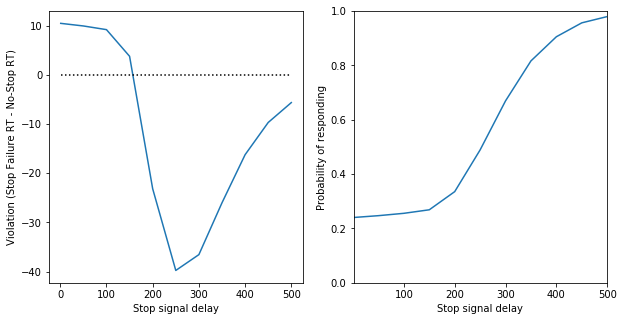

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(params['ssds'][:11],meanrtgo[:11] - meanrtgo[11])
plt.plot([params['ssds'][0],params['ssds'][10]],[0,0],'k:')
plt.xlabel('Stop signal delay')
plt.ylabel('Violation (Stop Failure RT - No-Stop RT)')
plt.subplot(1,2,2)
plt.plot(params['ssds'][:11],presp[:11])
plt.xlabel('Stop signal delay')
plt.ylabel('Probability of responding')
plt.axis([params['ssds'][0],params['ssds'][10],0,1])
